## ДЗ семинар 9.   
## Линейная регрессия. Логистическая регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd

#### Задача 1:   
*Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):    
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],    
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].    
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).    
Произвести расчет как с использованием intercept, так и без.*

Примем значение зарплат как массив x, а значения кредитного скоринга как массив y

In [2]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Проверим корреляцию для данных признаков:

In [3]:
np.corrcoef(x, y) [1, 0]

0.8874900920739164

Расситаем коэффициенты по формулам:   
$b_1 = {\frac {n\sum_{i=1}^n x_i y_i -(\sum_{i=1}^n x_i)(\sum_{i=1}^n y_i)}{n\sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i)^2}}$   
    
$b_0 = \bar y - b_1\bar x$    

$\bar y = {\frac {\sum_{i=1}^ny_i}{n}}$    
   
$\bar x = {\frac {\sum_{i=1}^nx_i}{n}}$ 

In [4]:
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
print(f'Коэффициент при независимой переменной b1 = {b1:.2f}')

Коэффициент при независимой переменной b1 = 2.62


In [5]:
b0 = np.mean(y) - b1 * np.mean(x)
print(f'Интерсепт b0 = {b0:.2f}')

Интерсепт b0 = 444.18


Проверка коэффициентов с помощью встроенной функции линейной регрессии:

In [6]:
model = LinearRegression()

In [7]:
x = x.reshape(-1, 1)
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [8]:
regres = model.fit(x, y)

In [9]:
print(f'Интерсепт b0 = {regres.intercept_:.2f}')

Интерсепт b0 = 444.18


In [10]:
print(f'Коэффициент линейной регрессии b1 = {regres.coef_}')

Коэффициент линейной регрессии b1 = [2.62053888]


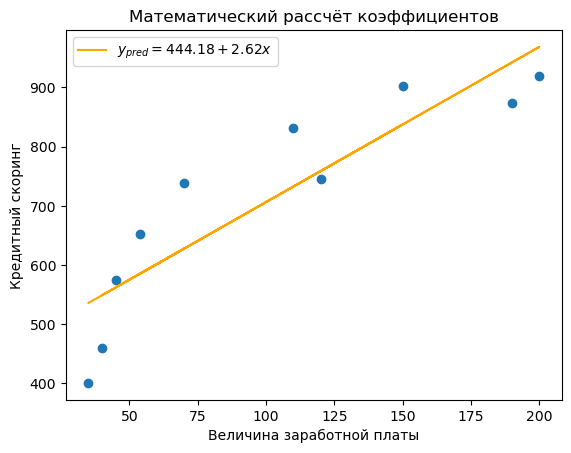

In [11]:
plt.scatter(x, y)
plt.plot(x, b0 + b1 * x, c='orange', label=r'$y_{pred}=444.18+2.62 x$')
plt.legend()
plt.title('Математический рассчёт коэффициентов')
plt.xlabel('Величина заработной платы')
plt.ylabel('Кредитный скоринг')
plt.show()

Расситаем коэффициент линейной регресии без учёта интерсепт:    
$y_{pred} = b_1 * x$    
Для рассчёта воспользуемся матричным методом:   
$\displaystyle\begin{pmatrix}y_1\\y_2\\y_3\\\dots\\y_n\end{pmatrix}=\begin{pmatrix}x_1\\x_2\\x_3\\\dots\\x_n\end{pmatrix}\cdot\begin{pmatrix}b_1\end{pmatrix}$ 

In [12]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [13]:
x = x.reshape(-1, 1)
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [14]:
y = y.reshape(-1, 1)
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [15]:
B = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T @ y)
print(f'Коэффициент линейной регресии b1 = {B}')

Коэффициент линейной регресии b1 = [[5.88982042]]


Отобразим на графиках полученные результаты: 

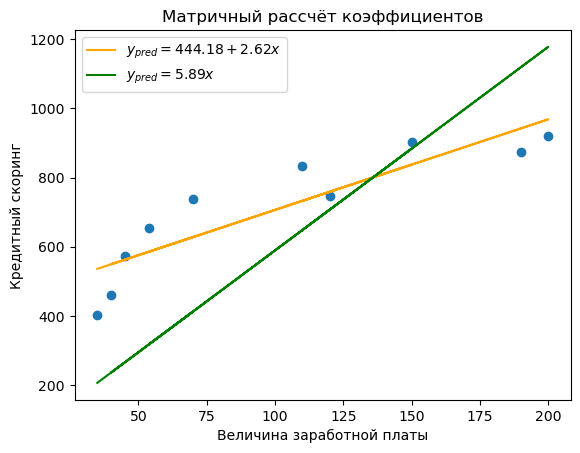

In [16]:
plt.scatter(x, y)
plt.plot(x, b0 + b1 * x, c='orange', label=r'$y_{pred}=444.18+2.62 x$')
plt.plot(x, B * x, c='g', label=r'$y_{pred}=5.89 x$')
plt.legend()
plt.title('Матричный рассчёт коэффициентов')
plt.xlabel('Величина заработной платы')
plt.ylabel('Кредитный скоринг')
plt.show()

#### Задача 2: 
*Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).*

In [17]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Напишем функцию для рассчёта меры измерения ошибки по формуле:   
$mse = \frac {\sum (y - y_{pred})^2}{n}$, где n - число измерений

In [18]:
def mse_b1(B1, x, y):  # функция рассчета меры измерения ошибки
    return np.sum(B1 * x - y) ** 2 / len(x)

In [19]:
# mse = 1 / len(x) * np.sum((b1 * x) - y) ** 2     # 
# mse_1 = (2 / len(x)) * np.sum((b1 * x - y) * x)   # производная для коэффициента B1

Зададим скорость обучения α 

In [20]:
alfa = 1e-6

Минимальное стартовое значение для искомого коэффициента $b_1$

In [21]:
b1 = 0.1

In [22]:
for i in range(3000):
    b1 -= alfa * (2/len(x)) * np.sum((b1 * x - y) * x)
    if i % 500 == 0:
        print ('Iteration = {i}, b1 = {b1}, mse = {mse}'.format(i = i, b1 = b1, mse = mse_b1(b1, x, y)))

Iteration = 0, b1 = 0.25952808, mse = 4672868.836557692
Iteration = 500, b1 = 5.889815595583751, mse = 126951.37011565862
Iteration = 1000, b1 = 5.8898204201285544, mse = 126950.26770844117
Iteration = 1500, b1 = 5.889820420132673, mse = 126950.26770750014
Iteration = 2000, b1 = 5.889820420132673, mse = 126950.26770750014
Iteration = 2500, b1 = 5.889820420132673, mse = 126950.26770750014


*Коэффициент линейной регрессии $b_1 = 5.88982$*

#### Задача 3:
*Произвести вычисления как в задаче 2, но с вычислением intercept.     
Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).*

In [28]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Напишем функцию для рассчёта меры измерения ошибки по формуле:   
$mse = \frac {\sum (y - y_{pred})^2}{n}$, где n - число измерений, $y_{pred} = b_0+b_1x$

In [29]:
def mse_b0_b1(B0, B1, x, y):  # функция рассчета меры измерения ошибки
    return np.sum(((B0 + B1 * x) - y) ** 2) /len(x)

*mse = 1 / len(x) * np.sum((b1 * x) - y) ** 2     -  Мера измерения ошибки    
mse_0 = (2 / len(x)) * np.sum((b1 * x) - y)       - производная для интерсепт B0   
mse_1 = (2 / len(x)) * np.sum((b1 * x - y) * x)   - производная для коэффициента B1*

Зададим скорость обучения α, минимальные стартовые значения для интерсепта $b_0$ и коэффициента линейной регрессии $b_1$

In [30]:
alfa = 5e-5
b0 = 0.1
b1 = 0.1

In [31]:
for i in range(1100001):
    b0 -= alfa * 2 * np.sum((b0 + b1 * x) - y) / len(x)
    b1 -= alfa * 2 * np.sum(((b0 + b1 * x) - y) * x) / len(x)
    if i % 50000 == 0:
        print ('Iteration = {i}, b0 = {b0}, b1 = {b1}, mse = {mse}'.format(i = i, b0 = b0, b1 = b1, mse = mse_b0_b1(b0, b1, x, y)))

Iteration = 0, b0 = 0.169966, b1 = 8.074680544760001, mse = 122318.06397097581
Iteration = 50000, b0 = 319.27767648420047, b1 = 3.5398324356503275, mse = 10427.569111705801
Iteration = 100000, b0 = 409.0442373734796, b1 = 2.879127619051743, mse = 6783.521961452364
Iteration = 150000, b0 = 434.29473705519484, b1 = 2.693277491833349, mse = 6495.188684804794
Iteration = 200000, b0 = 441.3974680483413, b1 = 2.6409995775222037, mse = 6472.374468908443
Iteration = 250000, b0 = 443.39540029510493, b1 = 2.62629428586797, mse = 6470.569306309746
Iteration = 300000, b0 = 443.95740007610897, b1 = 2.622157823932053, mse = 6470.426473787141
Iteration = 350000, b0 = 444.1154853937451, b1 = 2.6209942756156086, mse = 6470.415172240385
Iteration = 400000, b0 = 444.159953325044, b1 = 2.6206669802831115, mse = 6470.414278011555
Iteration = 450000, b0 = 444.1724617410292, b1 = 2.6205749151465225, mse = 6470.414207256183
Iteration = 500000, b0 = 444.1759802422447, b1 = 2.6205490180788695, mse = 6470.414201

*Интерсепт $b_0 = 444.1773$   
Коэффициент линейной регрессии $b1 = 2.6205$*

Выполним проверку с помощью встроенной функции LinearRegression()

In [43]:
model = LinearRegression()

In [44]:
x = x.reshape(-1, 1)
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [45]:
regres = model.fit(x, y)

In [46]:
print(f'Инерсепт = {regres.intercept_}')

Инерсепт = 444.1773573243596


In [47]:
print(f'Коэффициент линейной регрессии = {regres.coef_}')

Коэффициент линейной регрессии = [2.62053888]


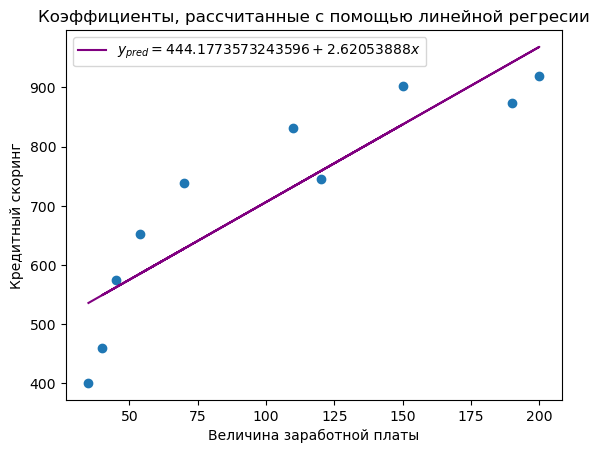

In [63]:
plt.scatter(x, y)
plt.plot(x, regres.intercept_ + regres.coef_ * x, c='purple', label=r'$y_{pred}=444.1773573243596+2.62053888 x$')
plt.legend()
plt.title('Коэффициенты, рассчитанные с помощью линейной регресии')
plt.xlabel('Величина заработной платы')
plt.ylabel('Кредитный скоринг')
plt.show()

In [24]:
x= np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y= np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
def mse_(B0, B1, y, x, n = 10):
    return np.sum((B0 + B1 * x - y) ** 2) / n

In [27]:
alpha = 1e-5
B0 = 0.1
B1 = 0.1
n = 10
for i in range(10):
    B0 -= alpha * (2 / n) * np.sum( B0 + B1 * x - y)
    B1 -= alpha * (2 / n) * np.sum( (B0 + B1 * x - y) * x)
    print('i = {i},B0 = {B0}, B1 = {B1}'.format(i = i,B0 = B0, B1 = B1))
for i in range(3000):
    B0 -= alpha * (2 / n) * np.sum( B0 + B1 * x - y)
    B1 -= alpha * (2 / n) * np.sum((B0 + B1 * x - y) * x)
    if i % 500 == 0:
        print('i = {i},B0 = {B0}, B1 = {B1}'.format(i = i,B0 = B0, B1 = B1))
for i in range(5000001):
    B0 -= alpha * (2 / n) * np.sum( B0 + B1 * x - y)
    B1 -= alpha * (2 / n) * np.sum((B0 + B1 * x - y) * x)
    if i % 50000 == 0:
        print('i = {i},B0 = {B0}, B1 = {B1}'.format(i = i,B0 = B0, B1 = B1))

i = 0,B0 = 0.1139932, B1 = 1.6950496217904003
i = 1,B0 = 0.12475135950300907, B1 = 2.850590213642176
i = 2,B0 = 0.1331658675225527, B1 = 3.6877253305175843
i = 3,B0 = 0.13988249723491258, B1 = 4.294189313045021
i = 4,B0 = 0.14536908365811257, B1 = 4.733541934741442
i = 5,B0 = 0.14996455323278376, B1 = 5.051829530264307
i = 6,B0 = 0.1539144436543431, B1 = 5.282410697639791
i = 7,B0 = 0.15739663647065652, B1 = 5.449452312918941
i = 8,B0 = 0.1605399992473275, B1 = 5.570462243117286
i = 9,B0 = 0.1634378910183007, B1 = 5.6581241883037094
i = 0,B0 = 0.16615794640660042, B1 = 5.721626946136699
i = 500,B0 = 1.292216141702719, B1 = 5.880352795729022
i = 1000,B0 = 2.41419551166727, B1 = 5.872094573403231
i = 1500,B0 = 3.5333325245744955, B1 = 5.863857271975932
i = 2000,B0 = 4.649634381085881, B1 = 5.855640838447342
i = 2500,B0 = 5.763108263621183, B1 = 5.847445219951942
i = 0,B0 = 6.873761336404627, B1 = 5.8392703637581445
i = 50000,B0 = 104.84769721675355, B1 = 5.118142537086767
i = 100000,B0 =